In [1]:
import numpy as np
from matplotlib import pyplot as pl
import pandas as pd

In [2]:
class kmean(object):
    
    def __init__(self, datos=[],  k = 2):
        
        self.data = np.copy(datos)
        self.salida = np.copy(datos)
        self.k = k
        
        self.J = 99999999
        
        
        self.centroides = []
        self.centroides_nuevos = []
        
        self.tolerancia = 10
        
        self.num_iteraciones = 0
        

    def inicio(self):
        
        
        self.J = 99999999
        self.num_iteraciones = 0

        self.data = pd.DataFrame(self.data)
        cant = int(len(self.data)/self.k)
        indices = np.random.choice(self.data.index.to_numpy(),[self.k,cant])
        #self.data['clase']
        
        self.centroides = [self.data.loc[indices[i]][[0,1]].mean().to_numpy() for i in range(self.k)]
        
        
        
        
    def reasigno(self):
        
        mu = self.centroides

    
        nuevos_indices = lambda w: np.argmin(np.linalg.norm(w[[0,1]].to_numpy()-mu,2,axis=1))
        self.data['clase'] = self.data[[0,1]].T.apply(nuevos_indices)
        
        self.centroides_nuevos = self.data.groupby('clase').mean().to_numpy()
        
    def aplicar_algoritmo(self,tol):
        
        self.tolerancia = tol
        
        self.inicio()
        self.reasigno()
        self.num_iteraciones = self.num_iteraciones + 1

        
        x = self.data
        J_aux = sum([sum(np.linalg.norm((x[x['clase']==i]-x[x['clase']==i].mean())[[0,1]],2,axis=1)**2) for i in range(len(x.groupby('clase')))])
        
        while( self.J-J_aux > 0 ):
        #for i in range(5):
            self.num_iteraciones = self.num_iteraciones + 1
            self.centroides = self.centroides_nuevos
            self.J = J_aux
            self.salida = self.data.copy()
            
            self.reasigno()
            
            x=self.data            
            J_aux = sum([sum(np.linalg.norm((x[x['clase']==i]-x[x['clase']==i].mean())[[0,1]],2,axis=1)**2) for i in range(len(x.groupby('clase')))])
            

        

In [3]:
datos = np.random.randn(2,150).T

datos[0:50] = datos[0:50] + [0.5,0.2]
datos[50:100] = datos[50:100] + [-10,-1.5]

#np.random.shuffle(datos)

w = kmean(datos=datos,k=3)



In [4]:
w.aplicar_algoritmo(tol=0.0005)
mu = w.data.groupby('clase').mean()
print(w.num_iteraciones)
mu

6


0         1
clase                    
0      0.180601 -0.981993
1     -9.931302 -1.345474
2     -0.070698  0.573491

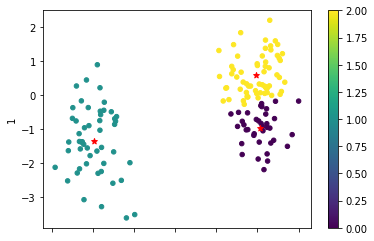

In [5]:
ax = w.salida[[0,1]].plot.scatter(x=0,y=1,c=w.salida['clase'],colormap='viridis');
#pd.DataFrame(mu).plot.scatter(x=0,y=1)
ax.scatter(mu[0],mu[1],marker='*',c='r');

In [6]:
w.salida[[0,1]].mean()

0   -3.295579
1   -0.449850
dtype: float64